## Modelos de clasificación con PyCaret

In [2]:
import numpy as np
import pandas as pd
import global_vars as gv
import pycaret.classification as pyc

In [3]:
diabetes = pd.read_csv(f'{gv.GLOBAL_PATH}/data/Diabetes.csv')

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
clsf1 = pyc.setup(data=diabetes, target='Outcome')

,Description,Value
0,Session id,6890
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [16]:
catboost_model = pyc.create_model('catboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:29:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8180,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.6852,0.8030,0.6316,0.5455,0.5854,0.3338,0.3361
2,0.7963,0.8767,0.7368,0.7000,0.7179,0.5587,0.5591
3,0.7963,0.8331,0.5789,0.7857,0.6667,0.5248,0.5375
4,0.8148,0.8977,0.6842,0.7647,0.7222,0.5840,0.5860
5,0.7407,0.8195,0.4737,0.6923,0.5625,0.3874,0.4014
6,0.7778,0.8301,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.7736,0.8603,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.7358,0.7810,0.5556,0.6250,0.5882,0.3948,0.3963


In [6]:
# model training
best_model = pyc.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:04:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7764,0.8330,0.5719,0.7392,0.6395,0.4818,0.4938,0.4390
ridge,Ridge Classifier,0.7709,0.8323,0.5509,0.7405,0.6264,0.4664,0.4809,0.0130
et,Extra Trees Classifier,0.7691,0.8286,0.5775,0.7098,0.6316,0.4673,0.4759,0.0500
catboost,CatBoost Classifier,0.7691,0.8380,0.6205,0.6930,0.6511,0.4800,0.4843,0.9590
lda,Linear Discriminant Analysis,0.7690,0.8318,0.5509,0.7369,0.6247,0.4630,0.4774,0.0120
rf,Random Forest Classifier,0.7655,0.8294,0.6266,0.6827,0.6493,0.4744,0.4784,0.0600
ada,Ada Boost Classifier,0.7653,0.8035,0.6257,0.6838,0.6481,0.4735,0.4784,0.0330
nb,Naive Bayes,0.7634,0.8190,0.6254,0.6765,0.6458,0.4694,0.4735,0.0110
gbc,Gradient Boosting Classifier,0.7559,0.8194,0.6094,0.6657,0.6337,0.4519,0.4547,0.0460
knn,K Neighbors Classifier,0.7524,0.7846,0.5827,0.6795,0.6216,0.4399,0.4471,0.1430


In [17]:
tune_best_model = pyc.tune_model(catboost_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:30:13
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.7880,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.7222,0.7820,0.6316,0.6000,0.6154,0.3982,0.3985
2,0.7963,0.8632,0.6842,0.7222,0.7027,0.5479,0.5484
3,0.8704,0.8872,0.6316,1.0000,0.7742,0.6897,0.7255
4,0.8333,0.9008,0.6842,0.8125,0.7429,0.6209,0.6259
5,0.7407,0.7774,0.4737,0.6923,0.5625,0.3874,0.4014
6,0.8148,0.8556,0.5789,0.8462,0.6875,0.5624,0.5828
7,0.7736,0.8302,0.6667,0.6667,0.6667,0.4952,0.4952
8,0.6792,0.7778,0.4444,0.5333,0.4848,0.2548,0.2570


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [18]:
tune_best_model.get_params()

{'depth': 8,
 'l2_leaf_reg': 50,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.5,
 'task_type': 'CPU',
 'n_estimators': 30,
 'random_state': 6890,
 'eta': 0.0005}

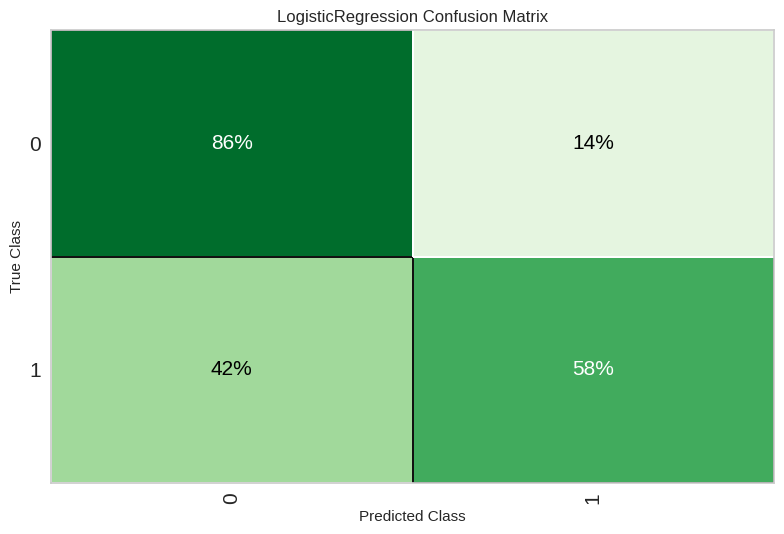

In [8]:
pyc.plot_model(best_model, plot='confusion_matrix', plot_kwargs = {'percent' : True})